In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors



In [2]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"

In [3]:
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
sys.path.append("/home/charles/Projects/alluvial_diagram")   

In [4]:
from OsmnxElev import *
import alluvial

In [5]:
#osmnx graph with neigh
graphQc=loadGraphElevGradesNeighQc()


File exists => reading graph


In [6]:
listNeigh=["Saint-Jean-Baptiste",\
                              "Saint-Roch",\
                              "Vieux-Québec/Cap-Blanc/Colline parlementaire",\
                              "Montcalm",\
                              "Saint-Sauveur"]

In [7]:
    #Shp file
    shpQcCity = gpd.read_file(os.path.join(ROOT_DIR, "Data", "GeoData", "Neighbourhoods", "vdq-quartier.shp"))
    shpNeighFiltered=shpQcCity[np.isin(shpQcCity["NOM"], listNeigh)]
    shpNeighFiltered.NOM.unique().tolist()

['Saint-Jean-Baptiste',
 'Vieux-Québec/Cap-Blanc/Colline parlementaire',
 'Montcalm',
 'Saint-Roch',
 'Saint-Sauveur']

In [8]:
i=1;j=2;listAllPairs=[];
listNodesi=[n for n, dat in graphQc.nodes.data() if re.match(".*" + listNeigh[i] + ".*", getSafeNeigh(n,dat)) is not None ]
listNodesj=[n for n, dat in graphQc.nodes.data() if re.match(".*" + listNeigh[j] + ".*", getSafeNeigh(n,dat)) is not None ]
listAllPairs+=getListEdgesCut(graphQc,listNodesi,listNodesj)

In [9]:
listAllPairs

[(3957287043, 466553341),
 (466553428, 2532091562),
 (265685886, 3957287006),
 (4177423637, 4177423638),
 (4177423644, 4177423643),
 (2547846494, 2302763156),
 (265662940, 265662941),
 (2360989091, 2360989094),
 (3400767565, 4185358392),
 (2532112758, 4790081112)]

In [10]:
#Get all edges formed by the nC2 cuts
#listAllPairs,dfAllEdges=getListEdgeAllPairsNeigh(graphQc, shpNeighFiltered.NOM.unique().tolist())

In [11]:
#print(dfAllEdges.shape)
#dfAllEdges.head()

In [12]:
#[ e for e in graphQc.edges.data() if np.isin(e,listAllPairs).all()  ]  #since we have pairs, need to test for both nodes in the set

In [13]:
fig,listAllPairs,dfEdgesAll=plotNeighCutQc(listNeigh=["Saint-Jean-Baptiste",\
                              "Saint-Roch", \
                             "Montcalm",\
                              "Vieux-Québec/Cap-Blanc/Colline parlementaire"])
fig.suptitle("Central neighbourhoods and bridges")

File exists => reading graph


Text(0.5, 0.98, 'Central neighbourhoods and bridges')

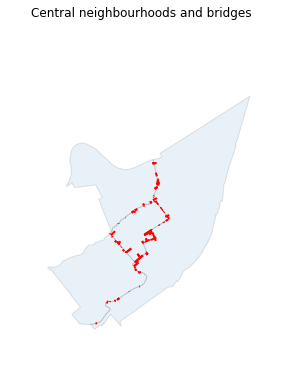

In [14]:
fig

In [15]:
fig.savefig(fname=os.path.join(ROOT_DIR,"Figures","4centralNeighAndBridges.png"))

In [16]:
dfEdgesAll.to_csv(os.path.join(ROOT_DIR,"Data","Csv","dfEdgesAll.csv"))

In [17]:
dfEdgesAll.shape

(152, 4)

In [18]:
dfEdgesAll.head()

startNode           startNeigh     endNode  \
0  1740959879  Saint-Jean-Baptiste  1910842689   
1  2531035463  Saint-Jean-Baptiste   177477995   
2  2380362200  Saint-Jean-Baptiste  2380362217   
3  2380362216  Saint-Jean-Baptiste   177481964   
4  5937293804  Saint-Jean-Baptiste  5937293805   

                                       endNeigh  
0  Vieux-Québec/Cap-Blanc/Colline parlementaire  
1  Vieux-Québec/Cap-Blanc/Colline parlementaire  
2  Vieux-Québec/Cap-Blanc/Colline parlementaire  
3  Vieux-Québec/Cap-Blanc/Colline parlementaire  
4  Vieux-Québec/Cap-Blanc/Colline parlementaire

In [19]:
dfEdgesAll.groupby(("startNeigh","endNeigh")).nunique()

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


startNode  \
startNeigh                                   endNeigh                                                  
Montcalm                                     Saint-Jean-Baptiste                                   7   
                                             Saint-Roch                                            1   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire         13   
Saint-Jean-Baptiste                          Montcalm                                             10   
                                             Saint-Roch                                            7   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire         31   
Saint-Roch                                   Montcalm                                              1   
                                             Saint-Jean-Baptiste                                   9   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire         10   
Vieux-Québec/Cap-Blanc/Colline parlementaire Montcalm                                             16   
                                             Saint-Jean-Baptiste                                  29   
                                             Saint-Roch                                            7   

                                                                                           startNeigh  \
startNeigh                                   endNeigh                                                   
Montcalm                                     Saint-Jean-Baptiste                                    1   
                                             Saint-Roch                                             1   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire           1   
Saint-Jean-Baptiste                          Montcalm                                               1   
                                             Saint-Roch                                             1   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire           1   
Saint-Roch                                   Montcalm                                               1   
                                             Saint-Jean-Baptiste                                    1   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire           1   
Vieux-Québec/Cap-Blanc/Colline parlementaire Montcalm                                               1   
                                             Saint-Jean-Baptiste                                    1   
                                             Saint-Roch                                             1   

                                                                                           endNode  \
startNeigh                                   endNeigh                                                
Montcalm                                     Saint-Jean-Baptiste                                 9   
                                             Saint-Roch                                          1   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire       13   
Saint-Jean-Baptiste                          Montcalm                                            7   
                                             Saint-Roch                                          7   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire       26   
Saint-Roch                                   Montcalm                                            1   
                                             Saint-Jean-Baptiste                                 9   
                                             Vieux-Québec/Cap-Blanc/Colline parlementaire       10   
Vieux-Québec/Cap-Blanc/Colline parlementa

In [20]:
listUniqueNeighPairs=list(set([(a,b) for a ,b in  dfEdgesAll[["startNeigh","endNeigh"]].values ]))
listUniqueNeighPairs

[('Montcalm', 'Saint-Roch'),
 ('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Saint-Jean-Baptiste'),
 ('Saint-Jean-Baptiste', 'Saint-Roch'),
 ('Saint-Roch', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
 ('Saint-Jean-Baptiste', 'Montcalm'),
 ('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Saint-Roch'),
 ('Montcalm', 'Saint-Jean-Baptiste'),
 ('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Montcalm'),
 ('Montcalm', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
 ('Saint-Roch', 'Saint-Jean-Baptiste'),
 ('Saint-Roch', 'Montcalm'),
 ('Saint-Jean-Baptiste', 'Vieux-Québec/Cap-Blanc/Colline parlementaire')]

In [21]:
dfEdgesAll.sort_values(by=["startNeigh"],inplace=True)
listNeighSorted=dfEdgesAll.startNeigh.unique()
dfNeighWithIdx=pd.DataFrame({"neigh":listNeighSorted, "neighIdx":[i for i in range(len(listNeighSorted))]})

In [22]:
dfEdgesAllWithIdx=pd.merge(dfEdgesAll, dfNeighWithIdx,
        how="left",
        left_on="startNeigh", right_on="neigh")

dfEdgesAllWithIdx=pd.merge(dfEdgesAllWithIdx, dfNeighWithIdx,
        how="left",
        left_on="endNeigh", right_on="neigh")

In [23]:
dfEdgesAllWithIdx.head()

startNode startNeigh     endNode  \
0   165232847   Montcalm  2753957347   
1   165232847   Montcalm  2753957348   
2  2359283382   Montcalm  2359283383   
3  1690393392   Montcalm  1740977668   
4  1690393246   Montcalm  1332961597   

                                       endNeigh   neigh_x  neighIdx_x  \
0                           Saint-Jean-Baptiste  Montcalm           0   
1                           Saint-Jean-Baptiste  Montcalm           0   
2                                    Saint-Roch  Montcalm           0   
3  Vieux-Québec/Cap-Blanc/Colline parlementaire  Montcalm           0   
4  Vieux-Québec/Cap-Blanc/Colline parlementaire  Montcalm           0   

                                        neigh_y  neighIdx_y  
0                           Saint-Jean-Baptiste           1  
1                           Saint-Jean-Baptiste           1  
2                                    Saint-Roch           2  
3  Vieux-Québec/Cap-Blanc/Colline parlementaire           3  
4  Vieux-Québec/Cap-Blanc/Colline parlementaire           3

In [24]:
#[(idxx,idxy) for idxx,idxy in dfEdgesAllWithIdx[["neighIdx_x","neighIdx_y"]].values]

In [25]:
def getIdx(i,j):
    if i < j:
        return(i,j)
    else:
        return(j,i)

In [26]:
dfEdgesAllWithIdx["pairIdx"] = [getIdx(idxx,idxy) for idxx,idxy in dfEdgesAllWithIdx[["neighIdx_x","neighIdx_y"]].values]

In [27]:
dfEdgesAllWithIdx.head()

startNode startNeigh     endNode  \
0   165232847   Montcalm  2753957347   
1   165232847   Montcalm  2753957348   
2  2359283382   Montcalm  2359283383   
3  1690393392   Montcalm  1740977668   
4  1690393246   Montcalm  1332961597   

                                       endNeigh   neigh_x  neighIdx_x  \
0                           Saint-Jean-Baptiste  Montcalm           0   
1                           Saint-Jean-Baptiste  Montcalm           0   
2                                    Saint-Roch  Montcalm           0   
3  Vieux-Québec/Cap-Blanc/Colline parlementaire  Montcalm           0   
4  Vieux-Québec/Cap-Blanc/Colline parlementaire  Montcalm           0   

                                        neigh_y  neighIdx_y pairIdx  
0                           Saint-Jean-Baptiste           1  (0, 1)  
1                           Saint-Jean-Baptiste           1  (0, 1)  
2                                    Saint-Roch           2  (0, 2)  
3  Vieux-Québec/Cap-Blanc/Colline parlementaire           3  (0, 3)  
4  Vieux-Québec/Cap-Blanc/Colline parlementaire           3  (0, 3)

In [28]:
dfBridgesCounts=pd.DataFrame( dfEdgesAllWithIdx.pairIdx.value_counts() ).reset_index()
dfBridgesCounts["startIdx"]=[ i[0] for i in dfBridgesCounts["index"].values]
dfBridgesCounts["endIdx"]=[ i[1] for i in dfBridgesCounts["index"].values]

In [29]:
dfBridgesCounts.head()

index  pairIdx  startIdx  endIdx
0  (1, 3)       67         1       3
1  (0, 3)       31         0       3
2  (0, 1)       19         0       1
3  (2, 3)       17         2       3
4  (1, 2)       16         1       2

In [30]:
dfBridgesCounts=pd.merge(dfBridgesCounts,dfNeighWithIdx, 
         how="left" ,
         left_on="startIdx", right_on="neighIdx")

dfBridgesCounts=pd.merge(dfBridgesCounts,dfNeighWithIdx, 
         how="left" ,
         left_on="endIdx", right_on="neighIdx")

In [31]:
from matplotlib import cm 
from matplotlib import colors 

normCol=colors.Normalize(vmin=np.min(dfBridgesCounts["pairIdx"]), vmax=np.max(dfBridgesCounts["pairIdx"]))
colMapGrades=cm.ScalarMappable(norm=normCol,cmap=cm.plasma)
colorEdges=[ colMapGrades.to_rgba(l) for l in dfBridgesCounts["pairIdx"] ]
dfBridgesCounts["col"]=colorEdges

In [32]:
dfBridgesCounts

index  pairIdx  startIdx  endIdx              neigh_x  neighIdx_x  \
0  (1, 3)       67         1       3  Saint-Jean-Baptiste           1   
1  (0, 3)       31         0       3             Montcalm           0   
2  (0, 1)       19         0       1             Montcalm           0   
3  (2, 3)       17         2       3           Saint-Roch           2   
4  (1, 2)       16         1       2  Saint-Jean-Baptiste           1   
5  (0, 2)        2         0       2             Montcalm           0   

                                        neigh_y  neighIdx_y  \
0  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
1  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
2                           Saint-Jean-Baptiste           1   
3  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
4                                    Saint-Roch           2   
5                                    Saint-Roch           2   

                                   col  
0  (0.940015, 0.975158, 0.131326, 1.0)  
1  (0.744232, 0.218288, 0.520524, 1.0)  
2  (0.506454, 0.016333, 0.656202, 1.0)  
3   (0.46555, 0.004545, 0.660139, 1.0)  
4   (0.441732, 0.00154, 0.660069, 1.0)  
5  (0.050383, 0.029803, 0.527975, 1.0)

In [33]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio

In [34]:
import urllib.request, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
with urllib.request.urlopen(url) as resp:
    data = json.loads(resp.read())

In [35]:
data_trace = dict(
    type='sankey',
    width = 1118,
    height = 772,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data['data'][0]['node']['label']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))

layout =  dict(
    title = "Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font = dict(
      size = 10,
      color = 'white'
    ),
    plot_bgcolor = 'black',
    paper_bgcolor = 'black'
)

fig = dict(data=[data_trace], layout=layout)
#py.iplot(fig, validate = False)

pio.write_image(fig, 
                                  validate=False, 
                                  file='plotly_static_image.png',
                                  format='png')
 

In [36]:
len(data['data'][0]['link']['value'])
len(data['data'][0]['link']['source'])

71

In [37]:
 data['data'][0]['node']['label'][:3]

["Agricultural 'waste'", 'Bio-conversion', 'Liquid']

In [38]:
data['data'][0]['link']['source'][:3]

[0, 1, 1]

In [39]:
dfBridgesCounts['neigh_x'].tolist()
dfBridgesCounts['pairIdx'].tolist()

[67, 31, 19, 17, 16, 2]

In [40]:
data_trace = dict(
    type='sankey',
    width = 1118,
    height = 772,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  dfBridgesCounts['neigh_x'].tolist(),
      color= ["grey" for i in range(dfBridgesCounts.shape[0])]
      
    ),
    link = dict(
      source =  dfBridgesCounts['neighIdx_x'].tolist(),
      target =  dfBridgesCounts['neighIdx_y'].tolist(),
      value =  dfBridgesCounts['pairIdx'].tolist(),
      label =  dfBridgesCounts['pairIdx'].tolist()#,
      #color = dfBridgesCounts['col']
  ))

layout =  dict(
    title = "Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data_trace], layout=layout)
pio.write_image(fig, 
                                  validate=False, 
                                  file='neighbourhood.png',
                                  format='png')

In [41]:
dataDictTest={ n1: {n2:count} for n1,n2,count in dfBridgesCounts[["neigh_x","neigh_y","pairIdx"]].values }
dataDictTest

{'Saint-Jean-Baptiste': {'Saint-Roch': 16},
 'Montcalm': {'Saint-Roch': 2},
 'Saint-Roch': {'Vieux-Québec/Cap-Blanc/Colline parlementaire': 17}}

In [42]:
dataDict={}
for n1 in dfBridgesCounts.neigh_x:
    dataDict[n1]={}
    for n2 in dfBridgesCounts.neigh_y:
        idx=(dfBridgesCounts.neigh_x==n1) & (dfBridgesCounts.neigh_y==n2)
        if np.sum(idx) > 0:
            dataDict[n1][n2]=dfBridgesCounts.loc[idx,"pairIdx"].tolist()[0]
        


In [43]:
dfBridgesCounts.head()

index  pairIdx  startIdx  endIdx              neigh_x  neighIdx_x  \
0  (1, 3)       67         1       3  Saint-Jean-Baptiste           1   
1  (0, 3)       31         0       3             Montcalm           0   
2  (0, 1)       19         0       1             Montcalm           0   
3  (2, 3)       17         2       3           Saint-Roch           2   
4  (1, 2)       16         1       2  Saint-Jean-Baptiste           1   

                                        neigh_y  neighIdx_y  \
0  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
1  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
2                           Saint-Jean-Baptiste           1   
3  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
4                                    Saint-Roch           2   

                                   col  
0  (0.940015, 0.975158, 0.131326, 1.0)  
1  (0.744232, 0.218288, 0.520524, 1.0)  
2  (0.506454, 0.016333, 0.656202, 1.0)  
3   (0.46555, 0.004545, 0.660139, 1.0)  
4   (0.441732, 0.00154, 0.660069, 1.0)

In [44]:
idxx=(dfBridgesCounts.neigh_x=='Saint-Jean-Baptiste') & (dfBridgesCounts.neigh_y=='Vieux-Québec/Cap-Blanc/Colline parlementaire')
dfBridgesCounts.loc[idxx,"pairIdx"].tolist()[0]

67

In [45]:
np.sum((dfBridgesCounts.neigh_x=='Saint-Roch') & (dfBridgesCounts.neigh_y=='Saint-Roch'))

0

In [46]:
dfEdgesAll.head()

startNode startNeigh     endNode  \
0    165232847   Montcalm  2753957347   
1    165232847   Montcalm  2753957348   
0   2359283382   Montcalm  2359283383   
13  1690393392   Montcalm  1740977668   
12  1690393246   Montcalm  1332961597   

                                        endNeigh  
0                            Saint-Jean-Baptiste  
1                            Saint-Jean-Baptiste  
0                                     Saint-Roch  
13  Vieux-Québec/Cap-Blanc/Colline parlementaire  
12  Vieux-Québec/Cap-Blanc/Colline parlementaire

In [47]:
dfBridgesCounts.head()

index  pairIdx  startIdx  endIdx              neigh_x  neighIdx_x  \
0  (1, 3)       67         1       3  Saint-Jean-Baptiste           1   
1  (0, 3)       31         0       3             Montcalm           0   
2  (0, 1)       19         0       1             Montcalm           0   
3  (2, 3)       17         2       3           Saint-Roch           2   
4  (1, 2)       16         1       2  Saint-Jean-Baptiste           1   

                                        neigh_y  neighIdx_y  \
0  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
1  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
2                           Saint-Jean-Baptiste           1   
3  Vieux-Québec/Cap-Blanc/Colline parlementaire           3   
4                                    Saint-Roch           2   

                                   col  
0  (0.940015, 0.975158, 0.131326, 1.0)  
1  (0.744232, 0.218288, 0.520524, 1.0)  
2  (0.506454, 0.016333, 0.656202, 1.0)  
3   (0.46555, 0.004545, 0.660139, 1.0)  
4   (0.441732, 0.00154, 0.660069, 1.0)

In [48]:
dfBridgesCountsRenamed=dfBridgesCounts.rename(columns={"neigh_x":"source",
                   "neigh_y":"target",
                   "pairIdx":"value"} )


In [49]:
dfBridgesCountsRenamed.head(2)
dfBridgesCountsRenamed.to_csv(os.path.join(ROOT_DIR,\
                                                     "Data",\
                                                     "Csv",\
                                                     "dfBridges.csv"))

In [50]:
dictEdgeList=dfBridgesCountsRenamed[["source","target","value"]].to_dict(orient="records")
dictEdgeList[:2]

[{'source': 'Saint-Jean-Baptiste',
  'target': 'Vieux-Québec/Cap-Blanc/Colline parlementaire',
  'value': 67},
 {'source': 'Montcalm',
  'target': 'Vieux-Québec/Cap-Blanc/Colline parlementaire',
  'value': 31}]

In [51]:
listTuples=[]
for k, row in dfEdgesAllWithIdx.iterrows():
    listTuples.append([row["neigh_x"],row["neigh_y"]])

In [52]:
#listTuples

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.



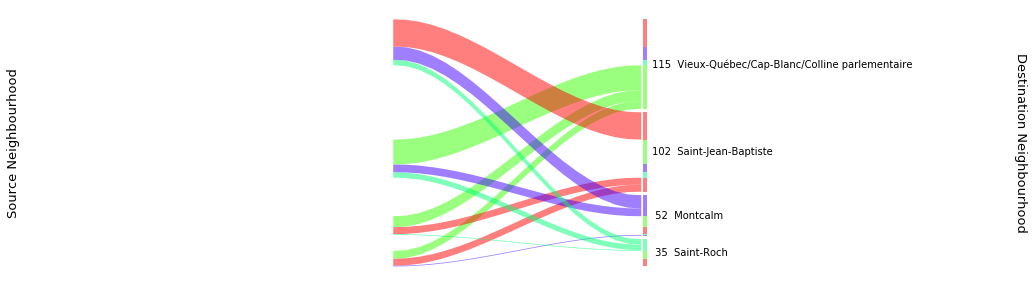

In [53]:
alluvial.plot(listTuples,
              color_side=1,
              label_shift=2,
              disp_width=True,
              wdisp_sep=' '*2,
              figsize=(5,5),
              labels=('Source Neighbourhood', 'Destination Neighbourhood'))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
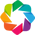

In [54]:
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)

In [55]:
dfBirdgesChord=dfBridgesCounts[["neighIdx_x","neighIdx_y","pairIdx"]].rename(columns={"neighIdx_x":"source","neighIdx_y":"target","pairIdx":"value"})

In [56]:
hv.Chord(dfBirdgesChord)

:Chord   [source,target]   (value)